# <font style="color:rgb(50,120,229)"> Implementando LeNet-5 </font>

En este cuaderno, construiremos un modelo de la arquitectura CNN LenNet-5 en Keras y lo utilizaremos para realizar clasificación en el conjunto de datos MNIST.

LenNet-5 es un modelo CNN pequeño que se presentó por primera vez en 1998. Aunque esta red es muy pequeña, tiene un rendimiento mucho mejor que una red MLP estándar porque las CNN son mucho más efectivas en el procesamiento de datos de imágenes.

<center>
<img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/2_Redes_Neuronales_Convolucionales/ejercicios/images/LeNet-5_architecture.png?raw=1" width=800px>
</center>

In [43]:
EPOCHS = 5
NUM_CLASSES = 10
IMAGE_SIZE = (28, 28, 1)

### <font style="color:rgb(50,120,229)"> 1. Cargar el conjunto de datos MNIST </font>

Primero, cargaremos el conjunto de datos MNIST.

<center>
<img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/2_Redes_Neuronales_Convolucionales/ejercicios/images/mnist.png?raw=1" width=800px>
</center>

In [44]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## <font style="color:rgb(50,120,229)"> 2 Visualizar algunas imágenes </font>

Vamos a crear una función para visualizar algunas imágenes del conjunto de datos MNIST.

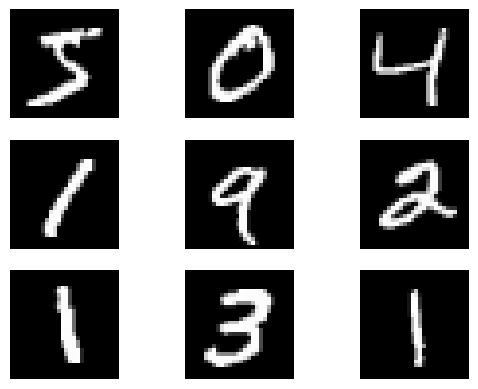

In [45]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [46]:
#TODO: Importa la función to_categorical de keras.utils y convierte las etiquetas a one-hot encoding
import numpy as np
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

## <font style="color:rgb(50,120,229)"> 2. Modelar LenNet-5 </font>


La arquitectura de LenNet-5 es:

- **Capa de entrada**: La imagen de entrada es de tamaño `32x32x1`.
- **Capa 1**: Convolucional con 6 filtros de tamaño `5x5` y función de activación `ReLU`.
- **Capa 2**: MaxPooling con un filtro de tamaño `2x2`.
- **Capa 3**: Convolucional con 16 filtros de tamaño `5x5` y función de activación `ReLU`.
- **Capa 4**: MaxPooling con un filtro de tamaño `2x2`.
- **Capa 5**: Aplanar la salida de la capa anterior.
- **Capa 6**: Totalmente conectada con 120 neuronas y función de activación `ReLU`.
- **Capa 7**: Totalmente conectada con 84 neuronas y función de activación `ReLU`.
- **Capa de salida**: Totalmente conectada con 10 neuronas (número de clases en MNIST) y función de activación `Softmax`.

In [47]:
#TODO: Crea un modelo Secuencial
from keras.models import Sequential

model = Sequential()

Recuerda que las imágenes del MNIST tienen un tamaño de `28x28`.

Definiremos una capa de entrada que cumpla con estas dimensiones y luego las reescalaremos a `32x32` para que coincidan con las dimensiones de entrada esperadas por la red LenNet-5.

In [48]:
#TODO: Define una capa de entrada que reciba una imagen de 28x28
from keras.layers import InputLayer

model.add(InputLayer(input_shape=IMAGE_SIZE))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Como mencionamos anteriormente, la red LenNet-5 espera imágenes de tamaño `32x32`. Por lo tanto, necesitamos reescalar las imágenes de entrada de `28x28` a `32x32`.

Esto se puede lograr utilizando la capa `Resizing` de Keras.

```python
from keras.layers import Resizing

model.add(
    Resizing(height, width, interpolation="bilinear", crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, fill_mode="constant", fill_value=0.0)
)
```

**Parámetros:**

- `height`: Altura de la imagen de salida.
- `width`: Ancho de la imagen de salida.
- `interpolation`: Método de interpolación utilizado para redimensionar la imagen. Puede ser uno de los siguientes valores: `nearest`, `bilinear`, `bicubic`, `lanczos3`, `lanczos5`.
- `crop_to_aspect_ratio`: Si es `True`, la imagen se recortará para que tenga la misma relación de aspecto que la imagen de entrada.
- `pad_to_aspect_ratio`: Si es `True`, la imagen se rellenará para que tenga la misma relación de aspecto que la imagen de entrada.
- `fill_mode`: Cuando pad_to_aspect_ratio es `True`, este parámetro especifica el método de relleno. Solo `constant` es compatible.
- `fill_value`: Valor de relleno cuando `fill_mode` es `constant`.

In [49]:
#TODO: Agrega una capa de resizing con fill_mode='constant' y valor de relleno 0
from keras.layers import Resizing

model.add(Resizing(height=32, width=32, fill_mode='constant', fill_value=0))

Otro paso importante es normalizar las imágenes. Cuando se trabaja con imágenes la normalización común es dividir por 255.0 para que los valores de píxeles estén en el rango `[0, 1]`.

Este proceso se puede conseguir con la capa `Rescaling` de Keras.

```python
from keras.layers import Rescaling

model.add(Rescaling(scale=1.0 / 255))
```

**Parámetros:**

- `scale`: Factor de escala.

In [50]:
#TODO: Añade una capa Rescaling al modelo

from keras.layers import Rescaling

model.add(Rescaling(scale=1.0 / 255))

La siguiente capa es una capa convolucional con 6 filtros de tamaño `5x5` y función de activación `ReLU`.

```python
from keras.layers import Conv2D

model.add(
    Conv2D(
        filters=6,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding="valid",
        activation="relu",
    )
)
```

**Parámetros:**

- `filters`: Número de filtros.
- `kernel_size`: Tamaño del kernel.
- `strides`: Desplazamiento del kernel.
- `padding`: Método de relleno.
- `activation`: Función de activación.

In [51]:
#TODO: Agrega la primera capa convolucional al modelo
from keras.layers import Conv2D
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), padding="valid", activation="relu"))

Después de la capa convolucional, agregamos una capa de MaxPooling con un filtro de tamaño `2x2`.

```python
from keras.layers import MaxPooling2D

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
```

**Parámetros:**

- `pool_size`: Tamaño del filtro.
- `strides`: Desplazamiento del filtro.

In [52]:
#TODO: Agrega una capa de MaxPooling2D al modelo
from keras.layers import MaxPooling2D

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [53]:
#TODO: Agrega la segunda capa convolucional al modelo y la capa de MaxPooling2D

model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), padding="valid", activation="relu"))

Despues de la última capa de agrupación, aplanamos la salida de la capa anterior. Esto se puede hacer con la capa `Flatten` de Keras.

```python
from keras.layers import Flatten

model.add(Flatten())
```

**Aplanar la salida es necesario para conectar la salida de la capa convolucional a la capa totalmente conectada.**

In [54]:
#TODO: Agrega una capa de Flatten al modelo
from keras.layers import Flatten

model.add(Flatten())

In [55]:
#TODO: Agrega las capas densas al modelo
from keras.layers import Dense
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation='relu'))

In [56]:
#TODO: Muestra un resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_2 (Resizing)                │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 120)                 │         192,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,706 (803.54 KB)

 Trainable params: 205,706 (803.54 KB)

 Non-trainable params: 0 (0.00 B)

## <font style="color:rgb(50,120,229)"> 4. Entrenar LenNet-5 </font>

In [57]:
#TODO: Compila el modelo utilizando el optimizador 'adam', la función de pérdida 'categorical_crossentropy' y la métrica 'accuracy'
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
#TODO: Entrena el modelo con los datos de entrenamiento, utiliza un validation_split del 0.2
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.1257 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.1001 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 74s 41ms/step - accuracy: 0.1020 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.1005 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.1001 - loss: nan - val_accuracy: 0.0995 - val_loss: nan


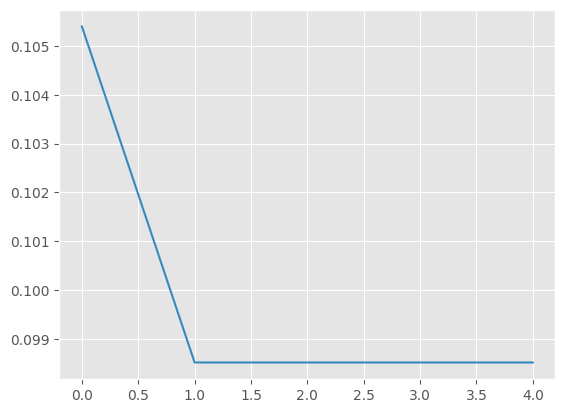

In [18]:
#TODO: Grafica la pérdida y la precisión del modelo
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

## <font style="color:rgb(50,120,229)"> 5. Evaluación del modelo </font>

Finalmente, evaluaremos el modelo en el conjunto de datos de prueba y visualizaremos algunas predicciones.

Esto nos dará una idea de cómo se desempeña nuestro modelo en datos que nunca ha visto antes.

In [19]:
#TODO: Evalúa el modelo con los datos de test
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.0924 - loss: nan


### <font style="color:rgb(50,120,229)"> 5.1. Visualizar algunas predicciones </font>

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


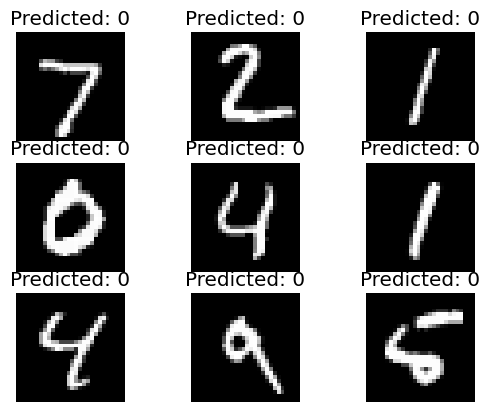

In [21]:
#TODO: Realiza algunas predicciones con los datos de test y muestra las imágenes y su predicción
predictions = model.predict(x_test)

import matplotlib.pyplot as plt
import numpy as np
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()
